In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

Было сгенерированно три матрицы с "эталонным" образцом размером 9x9.

# Квадрат
Данная функция не имеет входных данных. Сначала создается матрица 9 на 9 с единицами с помощью метода ones библиотеки numpy. С помощью цикла происходит изменение значений матрицы с 1 на -1 ("закрашивание"). В данном случае, необходимо закрасить перую и последнюю строку, с помощью условия проверяется, если индекс = 0 или -1 (т.е. последний), то эта строка закрашивается. Также проверяется, если первый или последний столбец, то данное значение меняется. Функция возвращает матрицу.

In [ ]:
def sqr():
  square = np.ones((9,9), dtype = int)
  for index, item in enumerate(square):
    # если первая или последняя строка - закрашиваем
    if index == 0 or index == len(square) - 1:
      square[index] = [-1 for i in range (len(item))]
    # если первый или последний столбец - закрашиваем
    for index_1, item_1 in enumerate(item):
      if index_1 == 0 or index_1 == len(item) - 1:
        item[index_1] = -1
  return(square)
square = sqr()

# Прямоугольник
Данная функция на вход не получает данные. Сначала создается матрица с единицами размером 9 на 9, в цикле с помощью условий меняются значения с 1 на -1. В первом условии проверяется, совпадает ли индекс с необходимым, в данном случае это 2 или -2, если да, то это значение меняется. Также, в другом цикле проверяется, если значение принадлежит первому или последнему столбцу и меньше 7 и больше 2, то этот элемент также закрашивается. Возвращает матрицу.

In [ ]:
def rect():
  rectangle = np.ones((9,9), dtype = int)

  for index, item in enumerate(rectangle):
    # если 2 или 2 с конца строка то закрашиваем
    if index == 2 or index == len(rectangle) - 2:
      rectangle[index] = [-1 for i in range (len(item))]
    for index_one, item_one in enumerate(item):
      # если координата на первом или последнем столбце и больше 2 или меньше 7 - закрашиваем
      if (index_one== 0 or index_one == len(item) -1) and (index <= 7 and index >= 2):
        item[index_one] = -1
  return(rectangle)
rectangle = rect()

# Треугольник
Данная функция на вход не получает данные. Сначала создается матрица с единицами размером 9 на 9. Инициализируется переменная n = 1, которая в последствии позволяет "нарисовать" ровынй треугольник. В цикле с помощью условий меняются значения с 1 на -1. В первом условии проверяется, совпадает ли индекс с необходимым, в данном случае это 9 - 3, если да, то это вся строка окрашивается. Также, в другом цикле проверяется, если значение лежит посередине и на третьей строке, то оно окрашивается, также, если элемент это сумма или разница серединного элемента и n, то этот элемент окрашивается, а значение n увеличивается на 1. Функция возвращает матрицу.

In [ ]:

def tri():
  triangle = np.ones((9,9), dtype = int)
  n = 1
  # закрашиваем строку
  for index, item in enumerate(triangle):
    if index == len(item) - 3:
      triangle[index] = [- 1 for i in range (len(item)) ]

    for index_one, item_one in enumerate(triangle):
      # находится серединный элемент определенной строки
      if (index_one == round(len(item)/2)  ) and index == 2:
        item[index_one] = -1
      else:
          # находится серединный элемент с шагом
          if ((index_one == round(len(item)/2) + n) and index == n + 2):
            item[index_one] = -1
            item[round(len(item)/2) - n] = -1
            n += 1
  return triangle
triangle = tri()


Эталонные изображения были визуализированы.

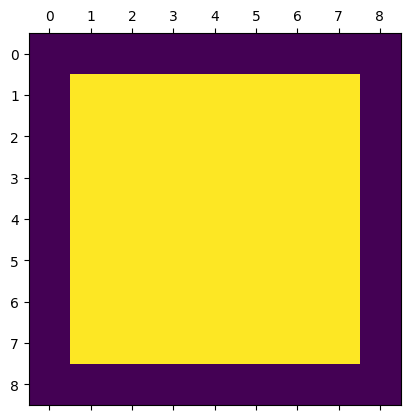

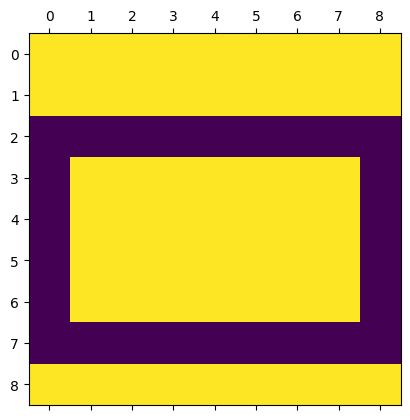

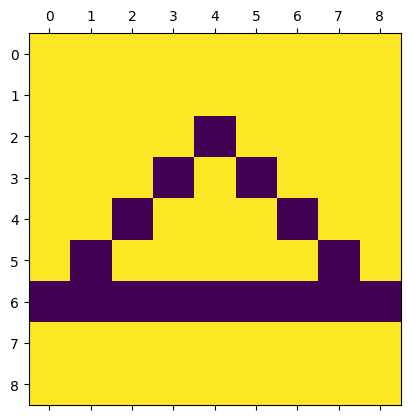

In [ ]:
plt.matshow(square)
plt.matshow(rectangle)
plt.matshow(triangle)

Был создан набор данных для зашумления для каждого из изображений. Была создана функция noise, которая получает на вход матрицу matrix и percent - процент зашумления изображения. Сначала высчитывается кол-во пикселей, которые будут закрашены, т.к. это значение - десятичная дробь, то необходимо округлить его к меньшему с помощью функции trunc библиотеки math. В цикле while генерируются координаты с помощью функции randint библиотеки random, также проверяется, если ранее эти пиксели были закрашены, то индекс пересоздается. После чего меняется значение, если была 1, то будет -1, иначе 1. Возвращает матрицу.

In [ ]:
def noise(matrix,percent):
  # высчитывает кол-во пикселей, которые будут закрашены
  amount_of_pixels = math.trunc((len(matrix)**2) * (percent/100))
  while (amount_of_pixels > 0):
    # генериру.тся координаты
    index_one_was = len(matrix) + 2
    index_two_was = len(matrix) + 2
    index_one = random.randint(0,len(matrix) -1 )
    index_two = random.randint(0,len(matrix) - 1)
    was = True
    # проверяется, были ли уже заменены значения с такими координатами
    while(was):
      if index_one == index_one_was and index_two == index_two_was:
        was = True
        index_one = random.randint(0,len(matrix) -1 )
        index_two = random.randint(0,len(matrix) - 1)
      else:
        was = False
    # меняется значение
    if matrix[index_one][index_two] == 1:
      matrix[index_one][index_two] = -1
      amount_of_pixels -= 1
      index_one_was = index_one
    else:
      matrix[index_one][index_two] = 1
      amount_of_pixels -= 1
      index_two_was = index_two
  return matrix



Были созданы и выведены зашумленные изображения.

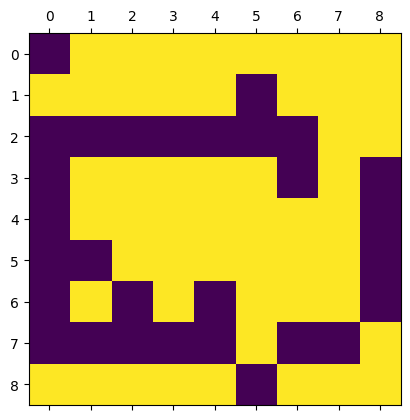

In [ ]:
rectangle_noise = rect()
rectangle_noise = noise(rectangle_noise,17)
plt.matshow(rectangle_noise)

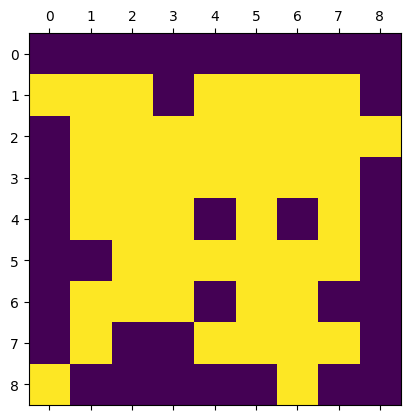

In [ ]:
square_noise = sqr()
square_noise = noise(square_noise,20)
plt.matshow(square_noise)

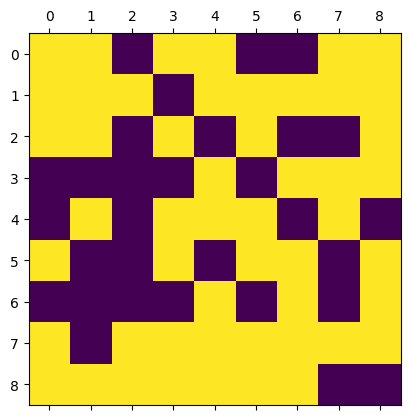

In [ ]:
triangle_noise = tri()
triangle_noise = noise(triangle_noise, 25)
plt.matshow(triangle_noise)

Была создана матрица весовых коэффициентов с помощью метода zeros библиотеки numpy. Потом в циклах к этой матрице суммируется внешнее произведение ветокоров матриц рисунков. С помощью метода flatten матрица преобразуется в вектор, с помощью метода outer было вычислено внешнее произведение векторов.
Были получены весовые коэффициенты для каждой из матриц

In [ ]:
weight = np.zeros((len(rectangle), len(rectangle)))
for item in rectangle:
  weight += np.outer(item.flatten(),item.flatten())
for item in square:
  weight += np.outer(item.flatten(),item.flatten())
for item in triangle:
  weight += np.outer(item.flatten(),item.flatten())
print(weight)


[[27.  3.  3.  3.  3.  3.  3.  3. 27.]
 [ 3. 27. 23. 23. 23. 23. 23. 27.  3.]
 [ 3. 23. 27. 23. 23. 23. 27. 23.  3.]
 [ 3. 23. 23. 27. 23. 27. 23. 23.  3.]
 [ 3. 23. 23. 23. 27. 23. 23. 23.  3.]
 [ 3. 23. 23. 27. 23. 27. 23. 23.  3.]
 [ 3. 23. 27. 23. 23. 23. 27. 23.  3.]
 [ 3. 27. 23. 23. 23. 23. 23. 27.  3.]
 [27.  3.  3.  3.  3.  3.  3.  3. 27.]]


Была создана функция, которая обнуляет диагональ матрицы. Функция получает на вход матрицу, с помощью вложенного цикла диагональным элементам присваивается 0

In [ ]:
def diagonal_zeroes(matrix):
  for index, item in enumerate(matrix):
    for index_one, item_one in enumerate(item):
      if index == index_one:
        matrix[index][index_one] = 0
  return matrix

Модель была обучена.

In [ ]:

weight = diagonal_zeroes(weight) * 1/len(weight)


Была создана функция, которая преобразует значения. На вход получает матрицу, с помощью вложенных циклов проверяется, если значение положительное, то заменяется на 1, в другом случае на -1

In [ ]:
def minus_plus(matrix):
  for index,item in enumerate(matrix):
    for index_one,item_one in enumerate(item):
      if item_one > 0:
        matrix[index][index_one] = 1
      else:
        matrix[index][index_one] = -1
  return(matrix)

Для предсказания необходимо зашумленное изображение умножить на матрицу весовых коэффициентов.

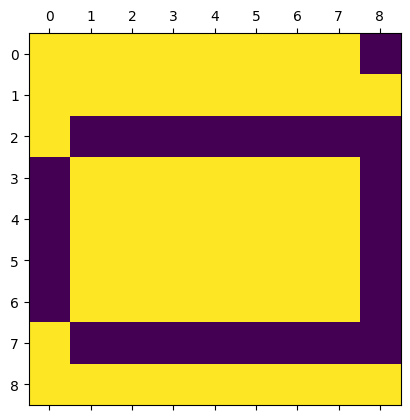

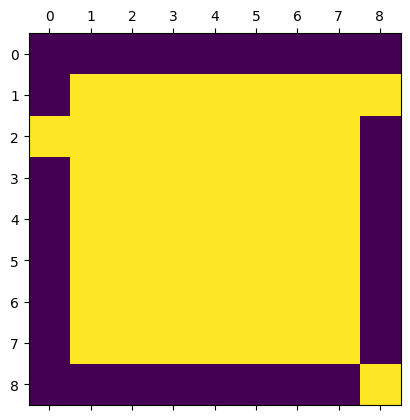

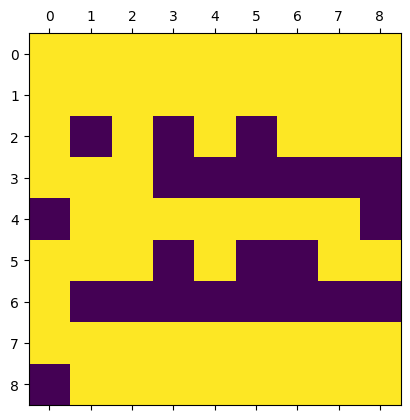

In [ ]:
pred_rect = np.dot(rectangle_noise,weight)
pred_square = np.dot(square_noise, weight)
pred_triangle = np.dot(triangle_noise, weight)

pred_rect = minus_plus(pred_rect)
pred_square = minus_plus(pred_square)
pred_triangle = minus_plus(pred_triangle)

plt.matshow(pred_rect)
plt.matshow(pred_square)
plt.matshow(pred_triangle)

По данным изображениям можно сделать вывод, что изображения квадрата и прямоугольника распознаются лучше, чем изображение треугольника, что может быть связано с значимым отличием изображений друг от друга.

Была написана функция, которая вычисляет количество неверно предсказанных пикселей. На вход она получает предсказанную матрицу и изначальную, сначала инициализируется переменная summ, в которую будет записываться кол-во неправильно угаданных пикселей, с помощью вложенных циклов проверяется, если значение различаются, то сумма увеличивается на 1. Функция возвращает сумму.

In [ ]:
def pred_pixels(matrix_preds, matrix):
  summ = 0
  for item, item_original in zip(matrix_preds, matrix):
    for pixel, pixel_noise in zip(item, item_original):
      if pixel != pixel_noise:
        summ += 1
  return(summ)

Для наглядного отображения набора изображений (эталонное, зашумленное, предсказанное) была написана функция, которая получает на вход эталонную матрицу, зашумленную и предсказанную, также заголовок в виде строки. Сначала создается канвас размером 1 на 3, после чего в ячейке 1:1 выводится первое изображение, эта ячейка подписывается, для следующих ячеек совершаются такие же действия. После этого канвас подписывается и выводится

In [ ]:
def show_me(matrix,matrix_noise,matrix_pred, title):
  fig, axes = plt.subplots(1,3) # создается канвас 1 строка 3 столбца
  axes[0].matshow(matrix) # в ячейке 1;1 выводится первое изображение
  axes[0].set_title("Эталонное")# ячейка 1;1 подписывается
  axes[1].matshow(matrix_noise)
  axes[1].set_title("Зашумленное")
  axes[2].matshow(matrix_pred)
  axes[2].set_title("Предсказанное")
  fig.suptitle(title) # подписывается канвас
  fig.show()

Каждый набор изображений был выведен.

Количество неверно предсказанных пикселей для прямоугольника:  3


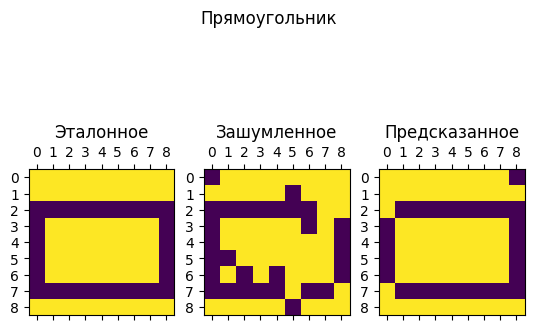

In [ ]:
show_me(rectangle,rectangle_noise,pred_rect, "Прямоугольник")
bad_pixels_rect = pred_pixels(pred_rect,rectangle)
print("Количество неверно предсказанных пикселей для прямоугольника: ",bad_pixels_rect)

Количество неверно предсказанных пикселей для квадрата:  3


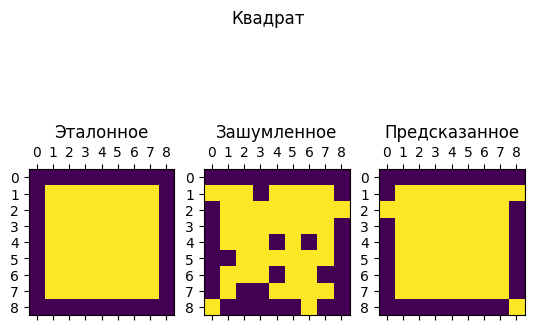

In [ ]:
show_me(square,square_noise,pred_square, "Квадрат")
bad_pixels_square = pred_pixels(pred_square,square)
print("Количество неверно предсказанных пикселей для квадрата: ",bad_pixels_square)

Количество неверно предсказанных пикселей для треугольника:  19


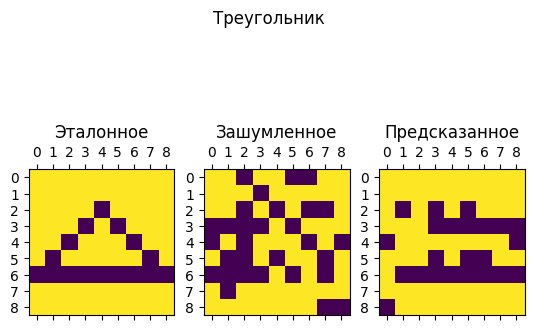

In [ ]:
show_me(triangle,triangle_noise,pred_triangle, "Треугольник")
bad_pixels_triangle = pred_pixels(pred_triangle,triangle)
print("Количество неверно предсказанных пикселей для треугольника: ",bad_pixels_triangle)

Был создан словарь, содержащий в себе 32 предсказанных изображения.
Сначала создатся словарь, затем в цикле создаются зашумленные изображения, на основе этих изображений предсказываются новые. Эти действия совершаются для каждого вида изображений.
После этого создается массив failure и массив good, в которые записываются предсказанные изображения, которые отличаются от эталонных и полностью совпадают. Отличающиеся изображения выводятся на экран.

<ipython-input-98-d426343c9a74>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(item)


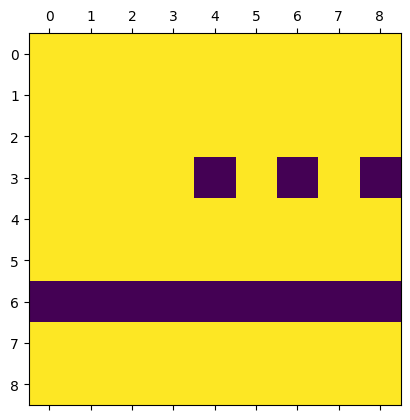

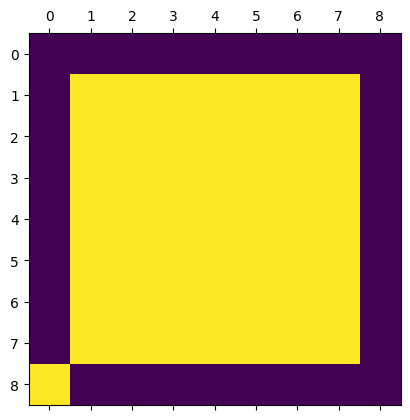

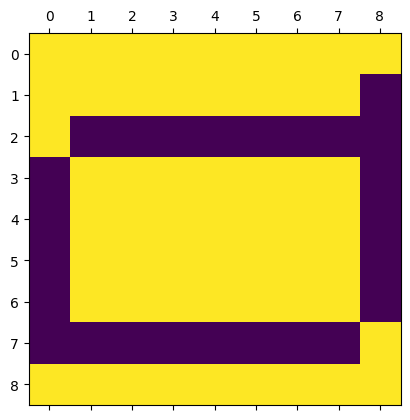

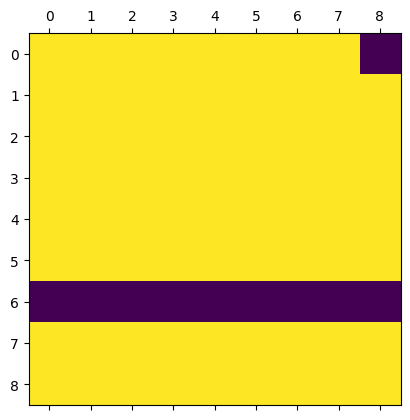

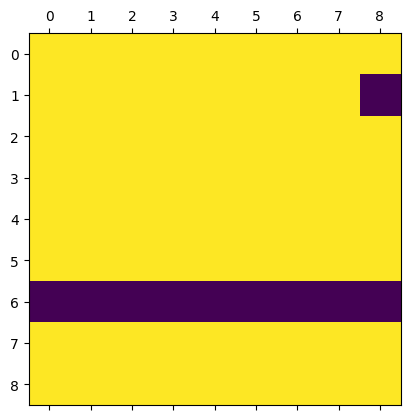

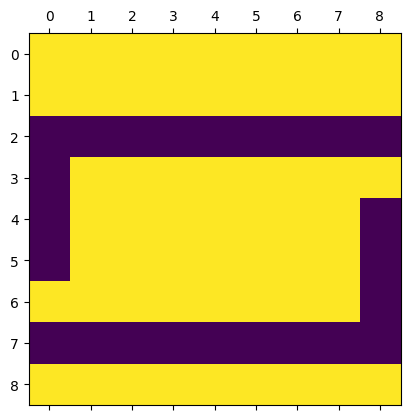

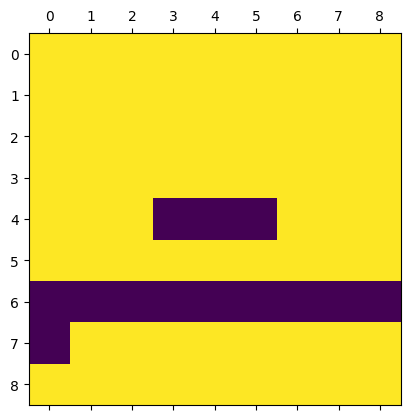

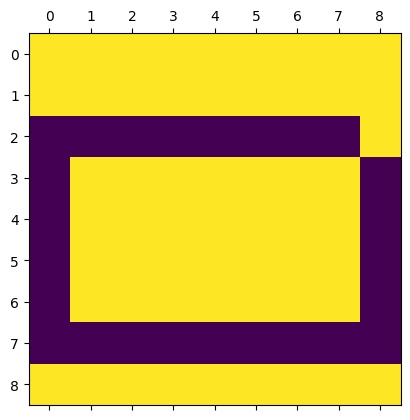

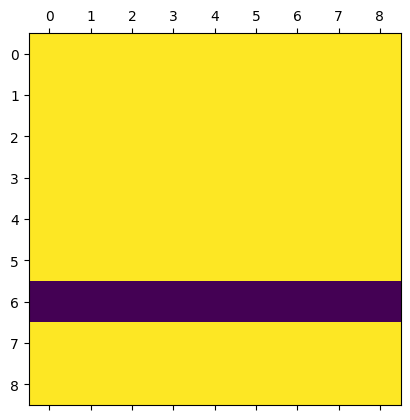

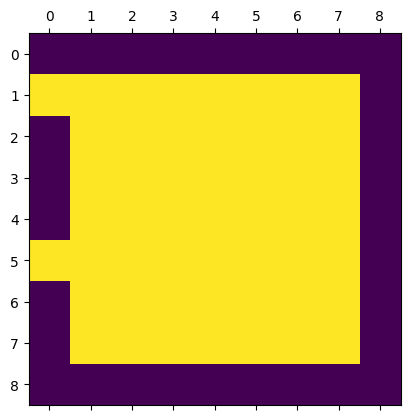

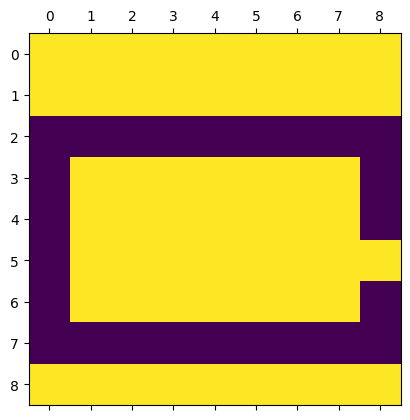

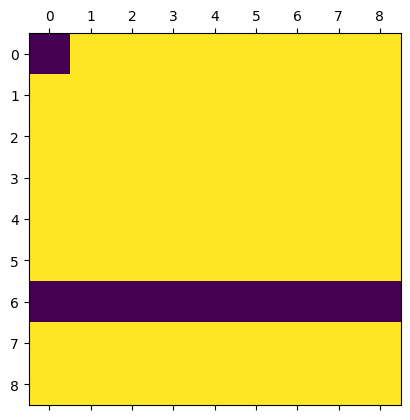

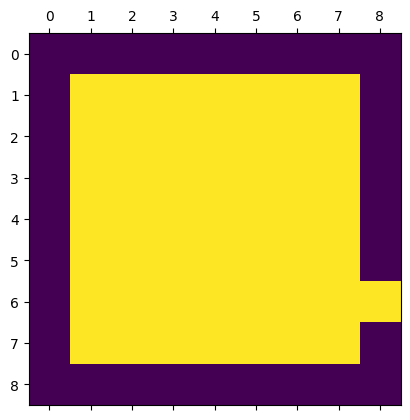

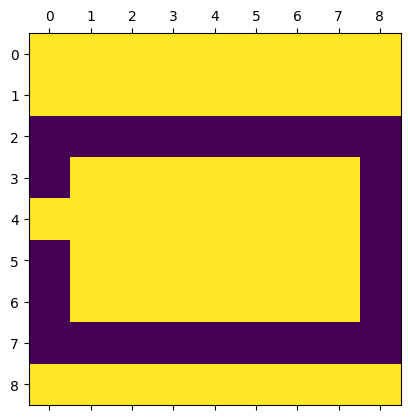

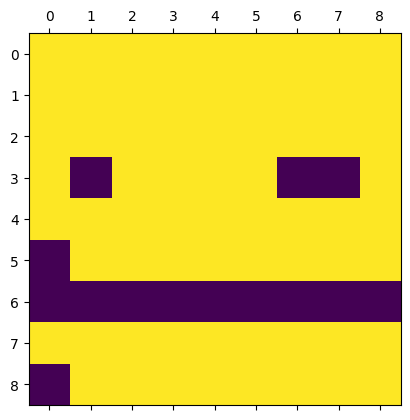

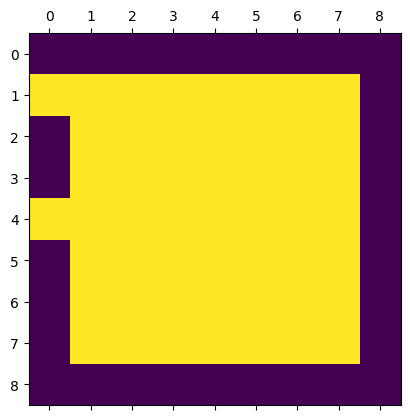

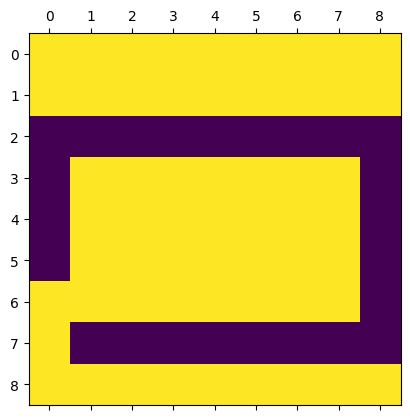

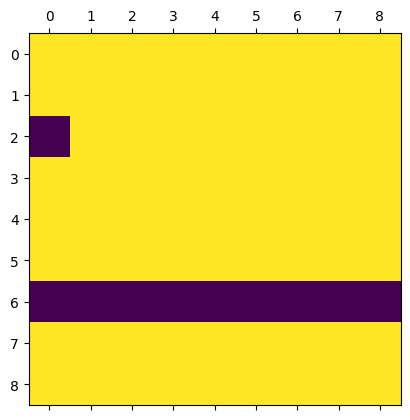

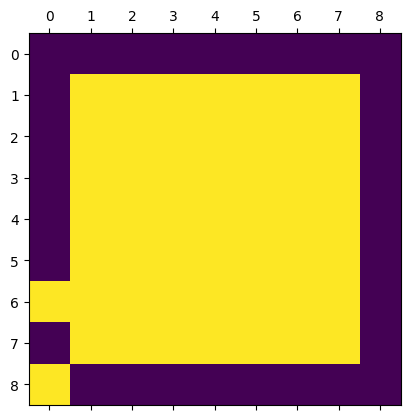

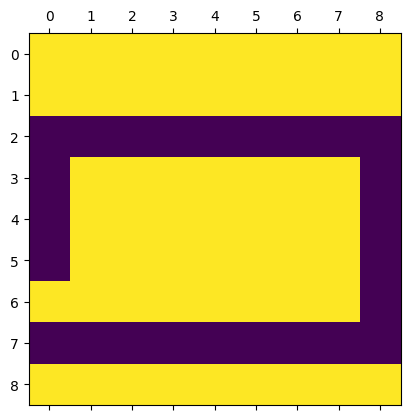

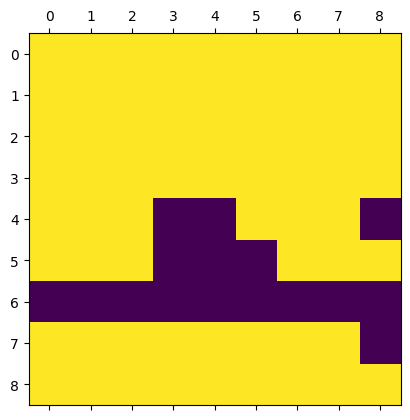

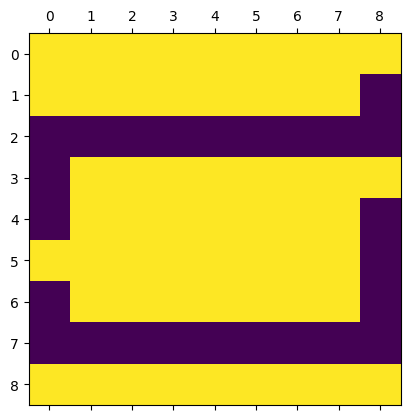

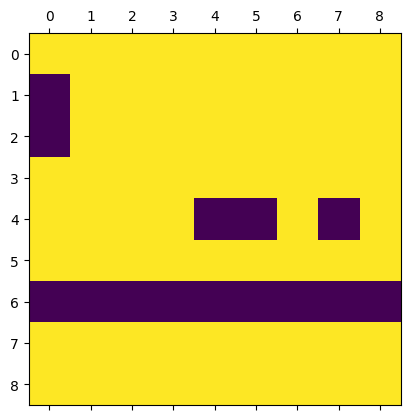

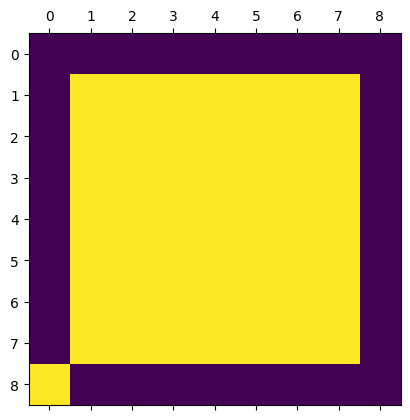

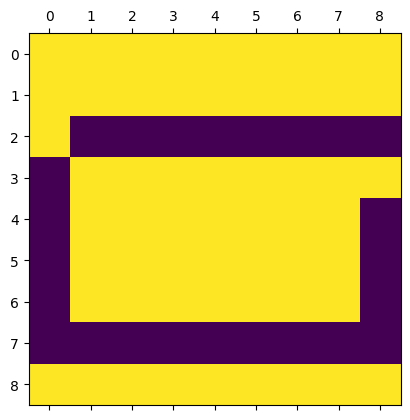

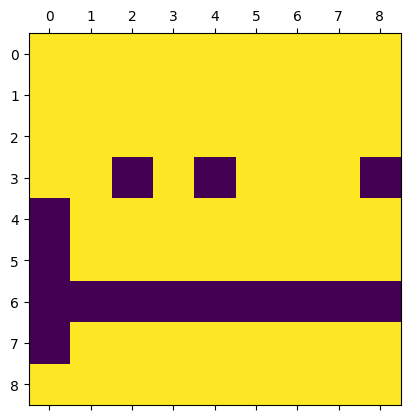

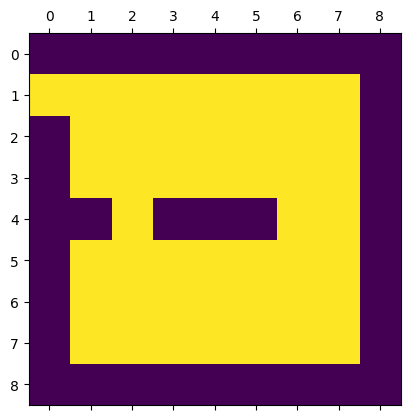

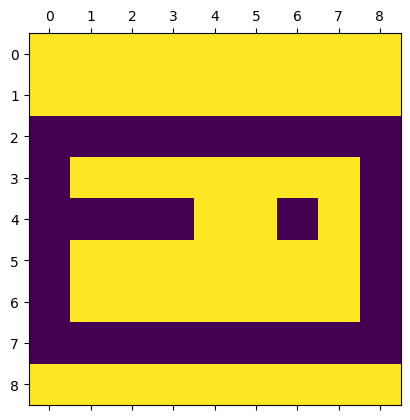

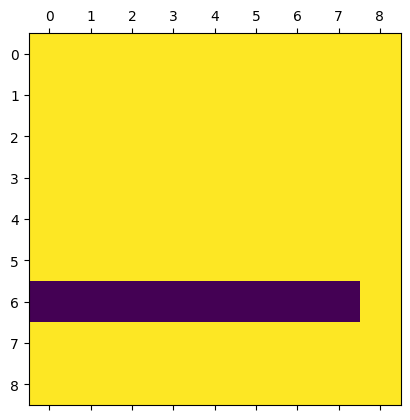

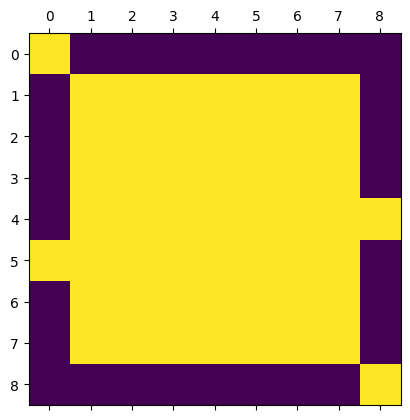

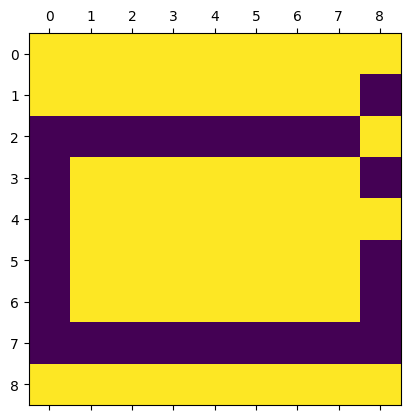

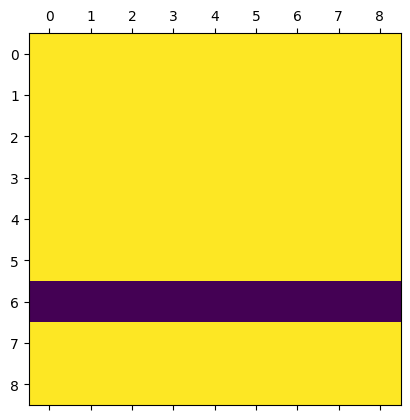

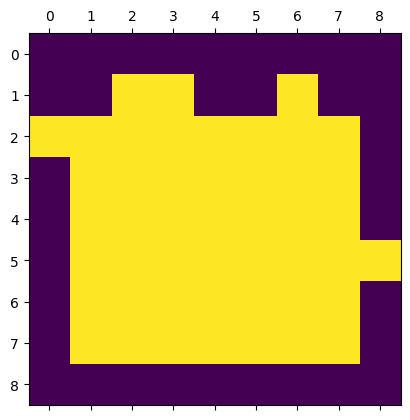

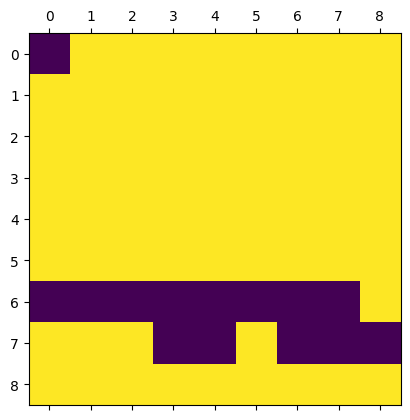

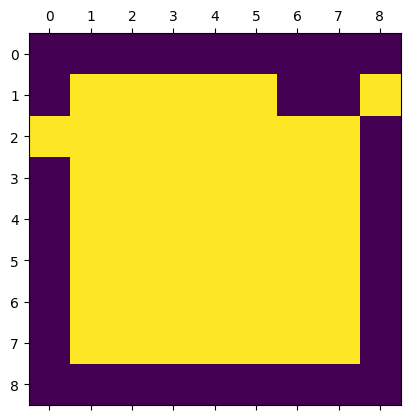

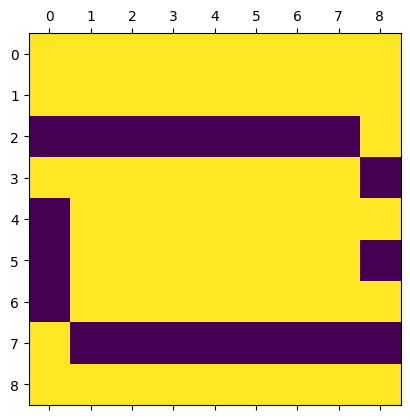

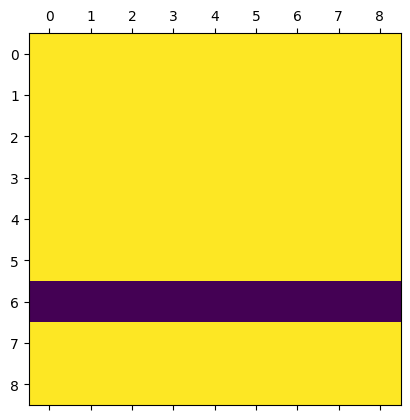

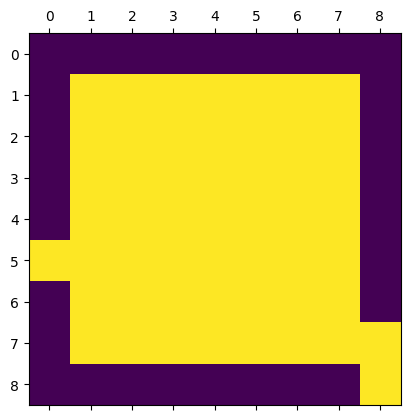

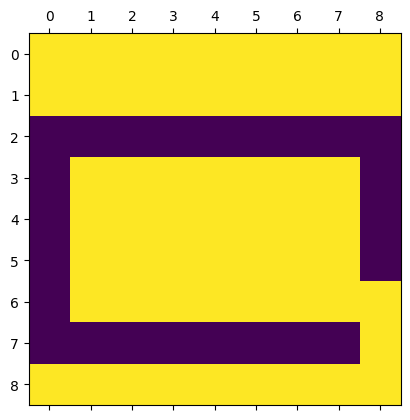

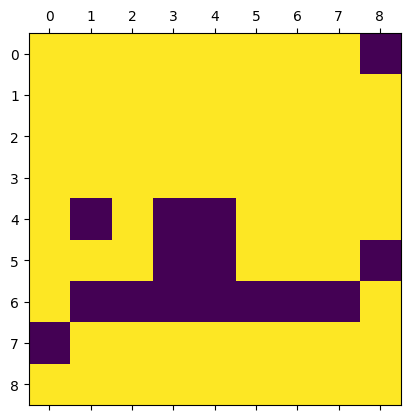

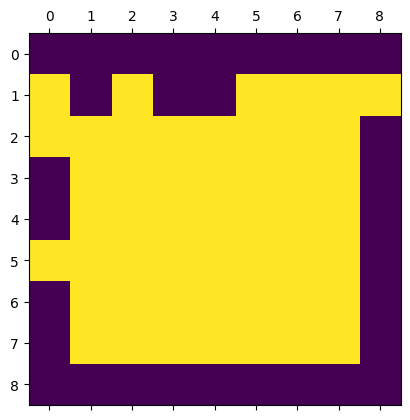

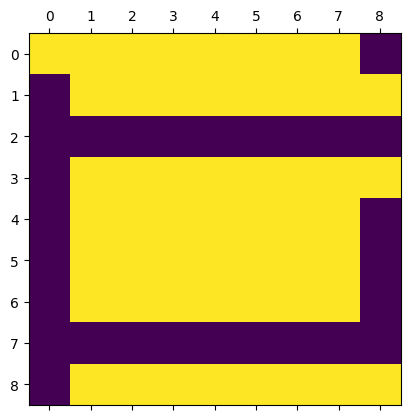

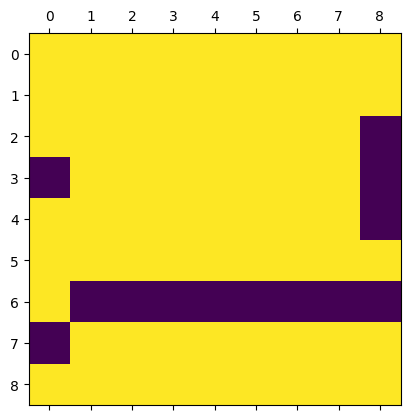

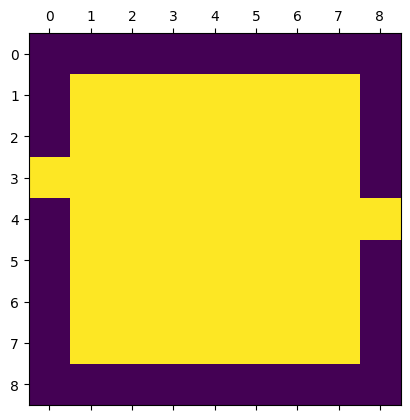

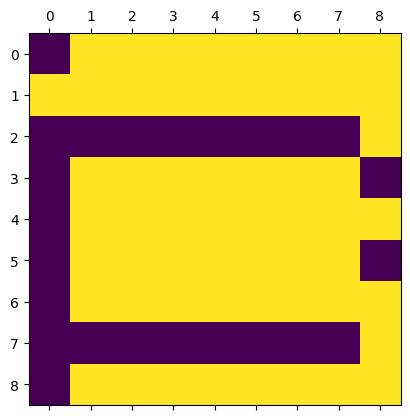

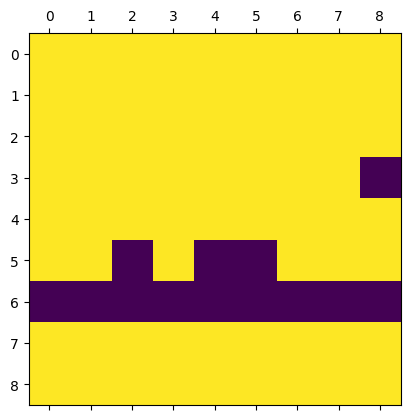

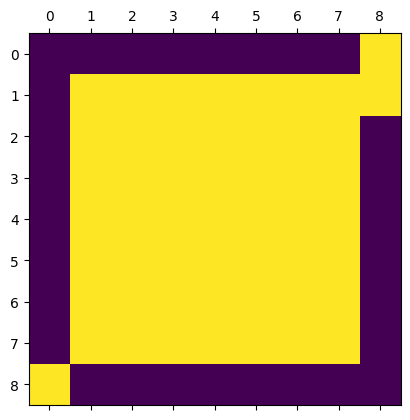

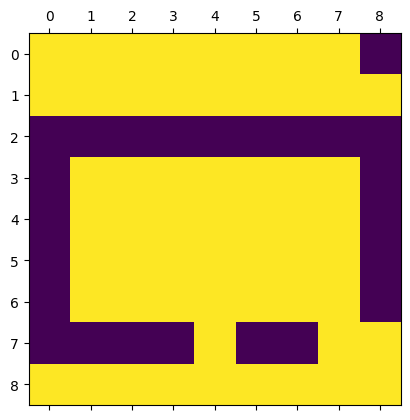

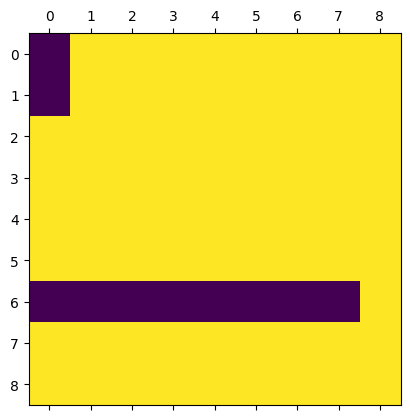

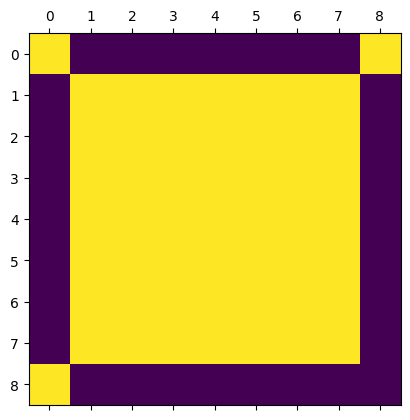

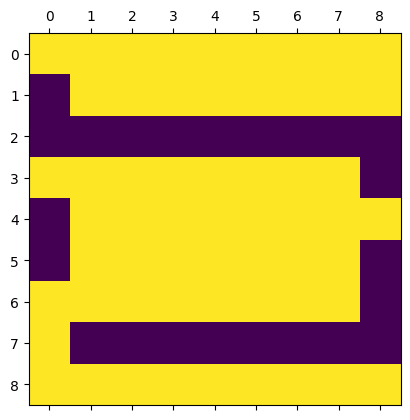

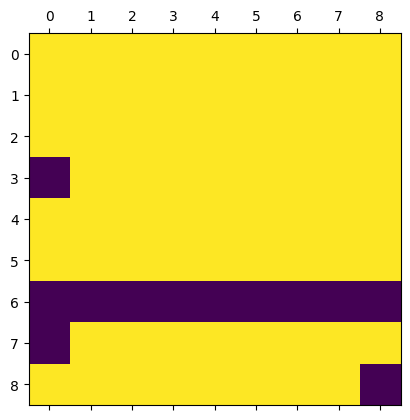

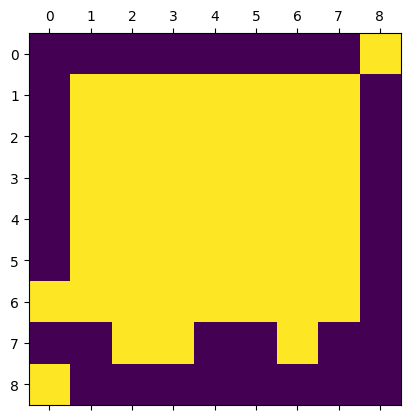

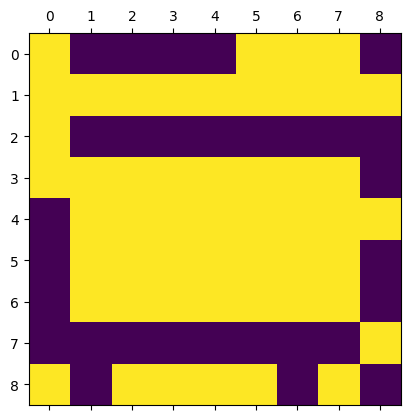

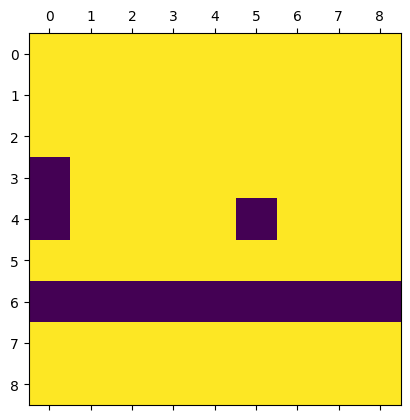

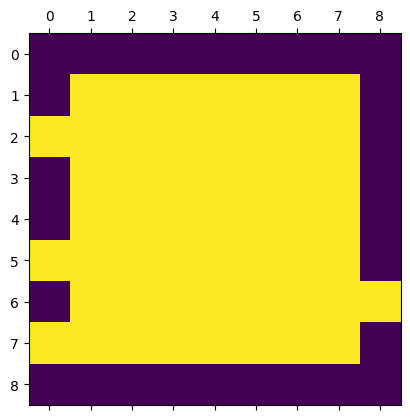

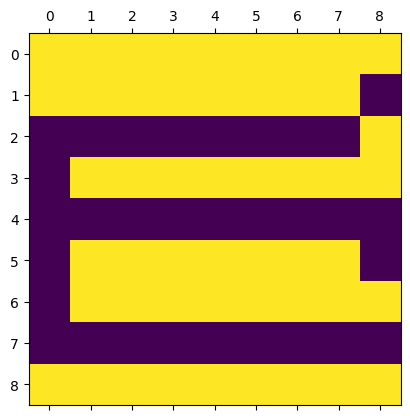

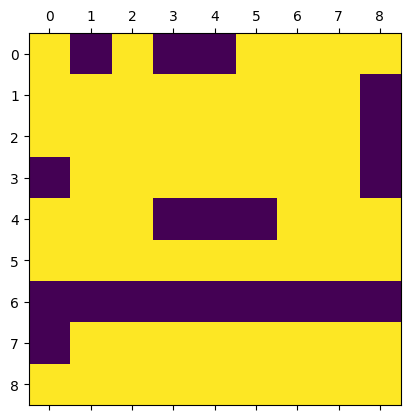

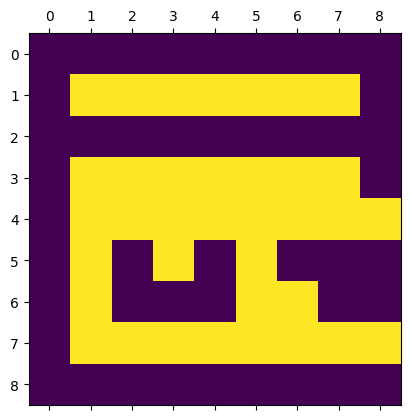

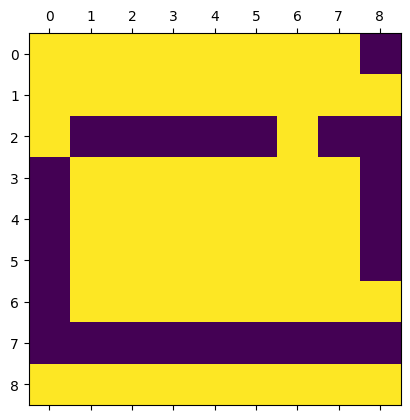

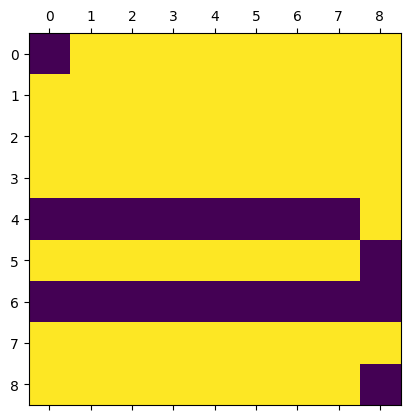

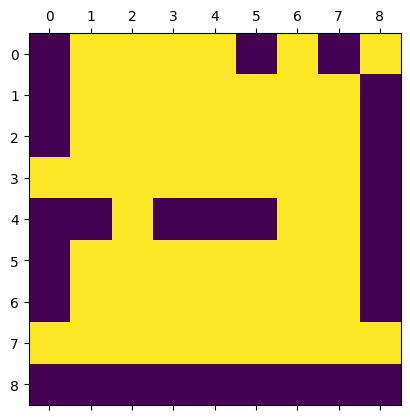

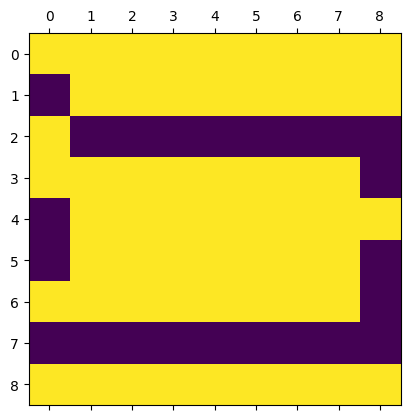

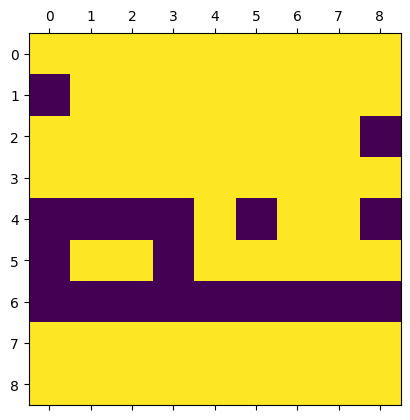

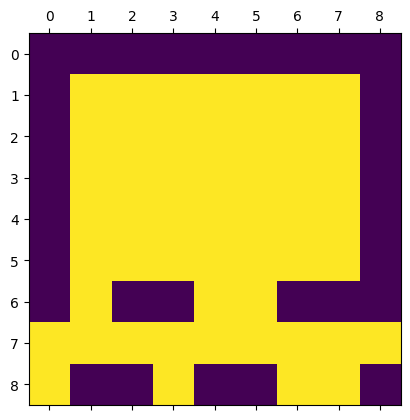

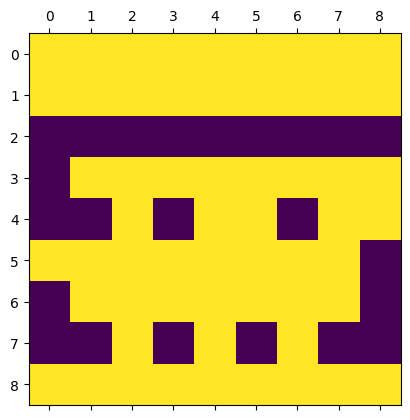

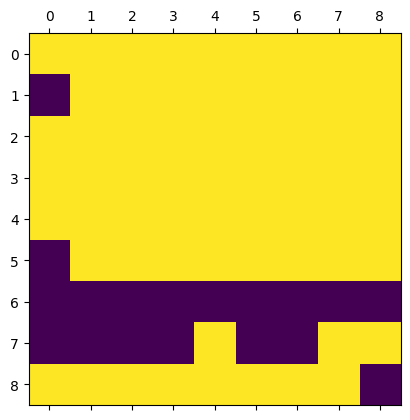

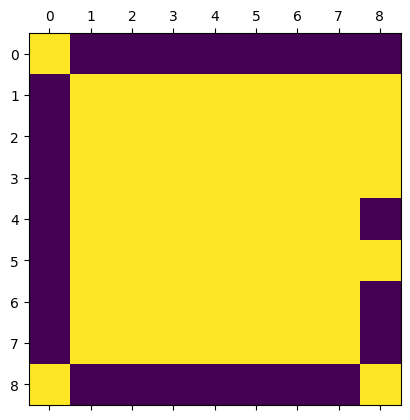

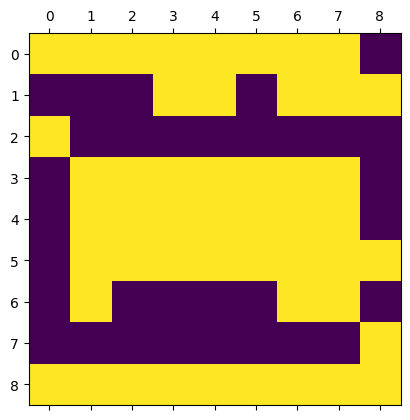

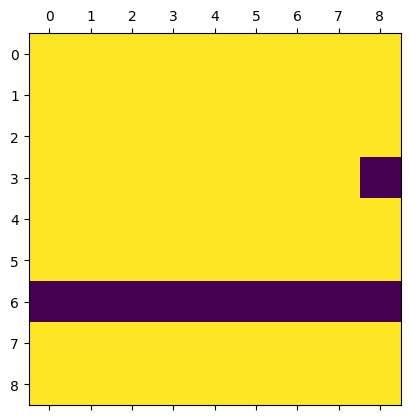

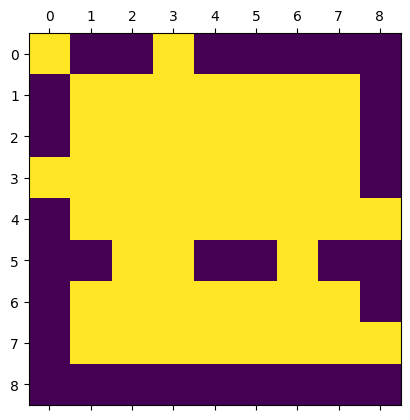

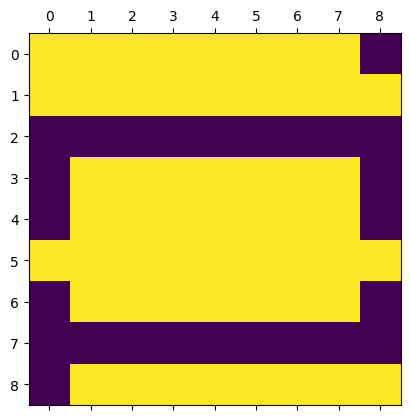

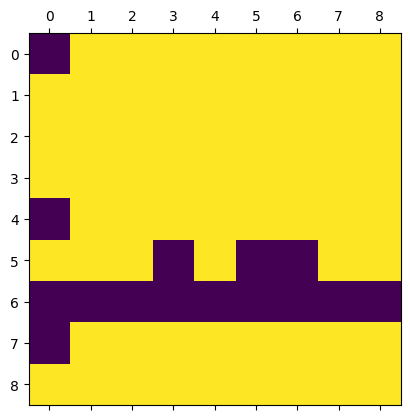

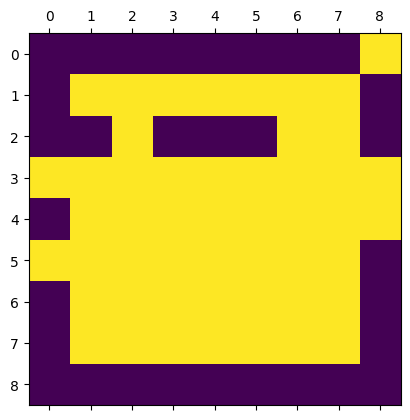

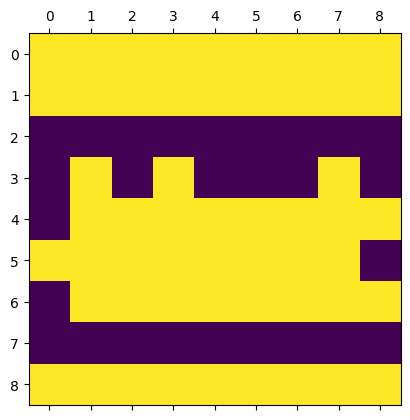

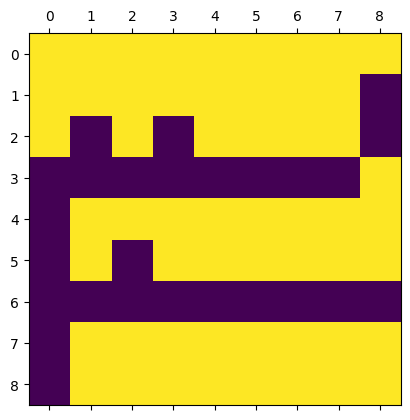

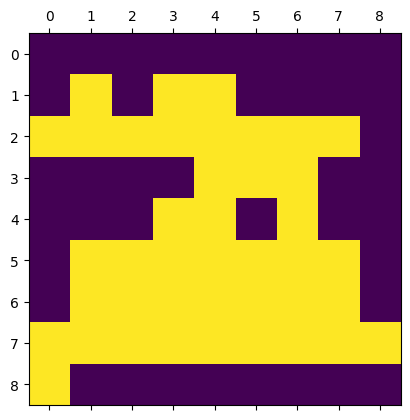

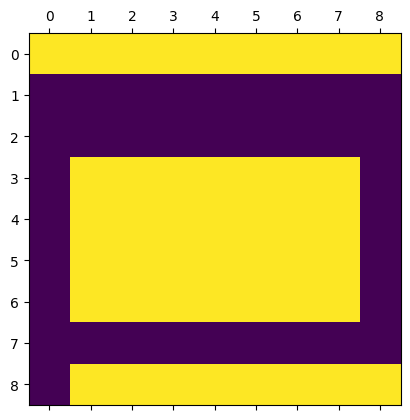

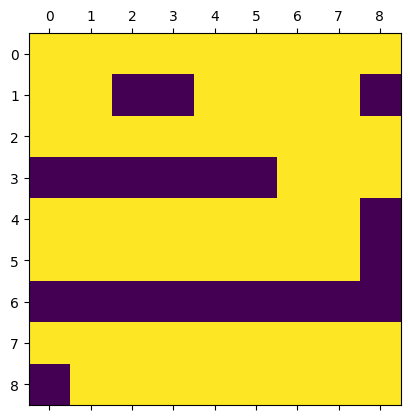

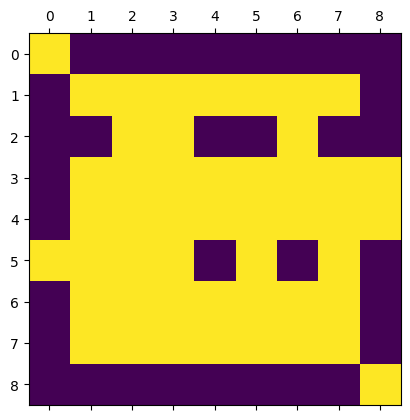

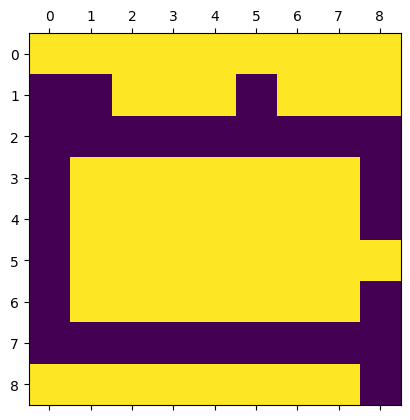

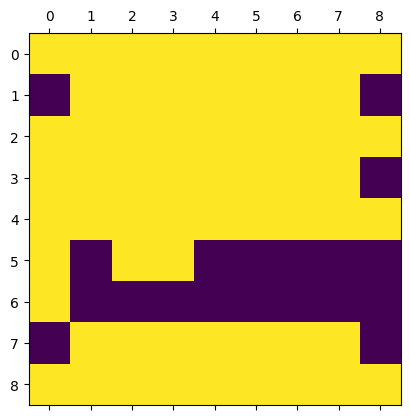

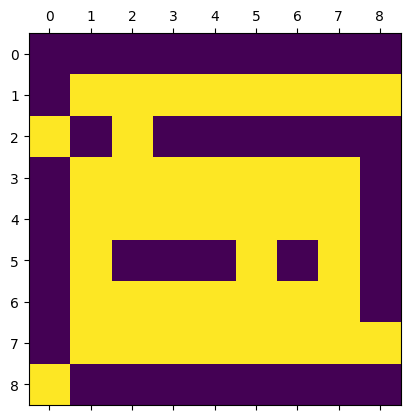

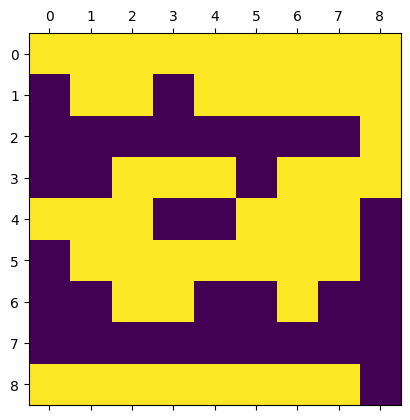

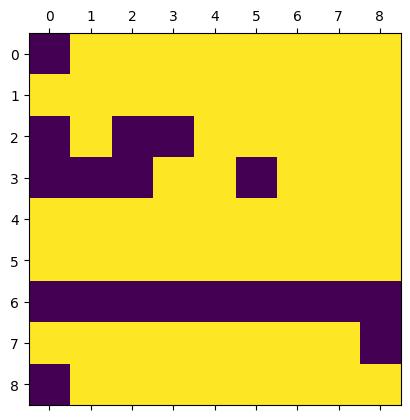

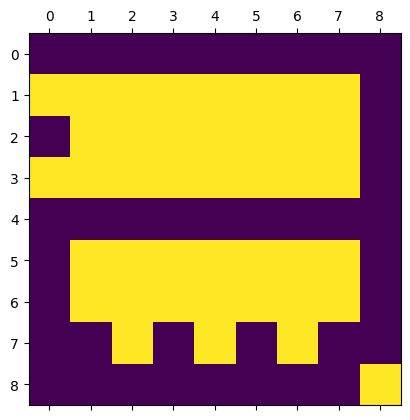

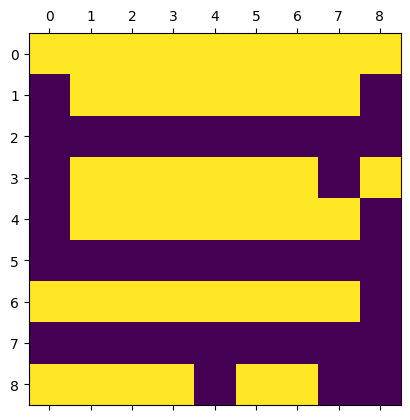

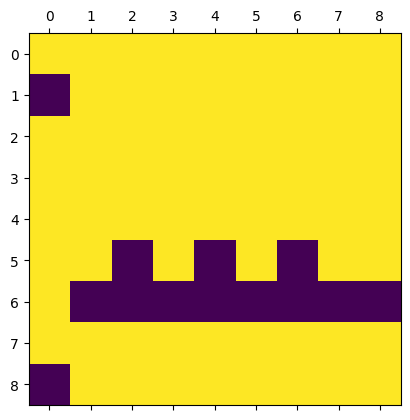

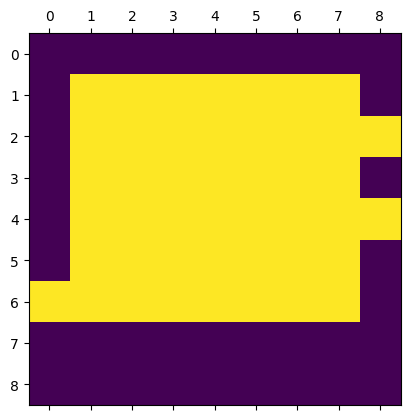

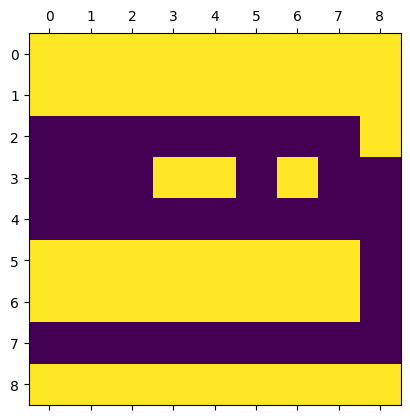

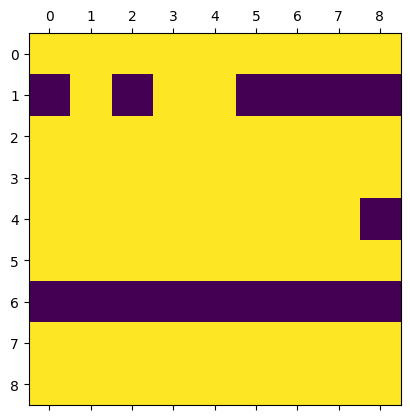

In [ ]:
dic = {}
for i in range(33):
  dic[f"Зашумленное квадрат {i}"] = noise(sqr(),i + 4)
  dic[f"Предсказанное квадрат{i}"] = minus_plus(np.dot(dic[f"Зашумленное квадрат {i}"], weight))
  dic[f"Зашумленное прямоугольник {i}"] = noise(rect(),i + 4)
  dic[f"Предсказанное прямоугольник{i}"] = minus_plus(np.dot(dic[f"Зашумленное прямоугольник {i}"], weight))
  dic[f"Зашумленное треугольник {i}"] = noise(tri(),i + 4)
  dic[f"Предсказанное треугольник{i}"] = minus_plus(np.dot(dic[f"Зашумленное треугольник {i}"], weight))

failure = []
good = []
for i in range(33):
  if not np.array_equal(dic[f"Предсказанное квадрат{i}"],square):
    failure.append(dic[f"Предсказанное квадрат{i}"])
  if  np.array_equal(dic[f"Предсказанное квадрат{i}"],square):
    good.append(dic[f"Предсказанное квадрат{i}"])
  if not np.array_equal(dic[f"Предсказанное прямоугольник{i}"],rectangle):
    failure.append(dic[f"Предсказанное прямоугольник{i}"])
  if  np.array_equal(dic[f"Предсказанное прямоугольник{i}"],rectangle):
    good.append(dic[f"Предсказанное прямоугольник{i}"])
  if not np.array_equal(dic[f"Предсказанное треугольник{i}"],triangle):
    failure.append(dic[f"Предсказанное треугольник{i}"])
  if  np.array_equal(dic[f"Предсказанное треугольник{i}"],triangle):
    good.append(dic[f"Предсказанное треугольник{i}"])

for item in failure:
  plt.matshow(item)

Была вычислена ошибка восстановления. Для этого была создана функция noise_pixels, которая получает на вход зашумленную матрицу и эталонную матрицу, сначала инициализируется переменная summ, в случае, если находятся несовпадающие пиксели, то сумма увеличивается на 1

In [ ]:
def noise_pixels(matrix_noise, matrix):
  summ = 0
  for item, item_original in zip(matrix_noise, matrix):
    for pixel, pixel_noise in zip(item, item_original):
      if pixel != pixel_noise:
        summ += 1
  return(summ)

Была вычислена ошибка для прямоугольника (отношение несовпадающих пикселей между предсказанным и эталонным и между зашумленным и эталонным)

In [ ]:

amount_noise_pixels = noise_pixels(rectangle_noise, rectangle)
amount_pred_pixels = pred_pixels(pred_rect, rectangle)
print(amount_pred_pixels/amount_noise_pixels)

0.2727272727272727


Для раннее созданных данных были вычислены ошибки. В цикле для каждого изображения вычисляются ошибки, с помощью раннее созданных функций.

In [ ]:
err = []
for i in range(33):
  amount_noise_pixels = noise_pixels(dic[f"Зашумленное прямоугольник {i}"],rectangle)
  amount_pred_pixels = pred_pixels(dic[f"Предсказанное прямоугольник{i}"], rectangle)
  err.append(amount_pred_pixels/amount_noise_pixels)
  amount_noise_pixels = noise_pixels(dic[f"Зашумленное квадрат {i}"],square)
  amount_pred_pixels = pred_pixels(dic[f"Предсказанное квадрат{i}"], square)
  err.append(amount_pred_pixels/amount_noise_pixels)
  amount_noise_pixels = noise_pixels(dic[f"Зашумленное треугольник {i}"],triangle)
  amount_pred_pixels = pred_pixels(dic[f"Предсказанное треугольник{i}"], triangle)
  err.append(amount_pred_pixels/amount_noise_pixels)

Был построен график зависимости ошибки восстановления от степени зашумления изображений

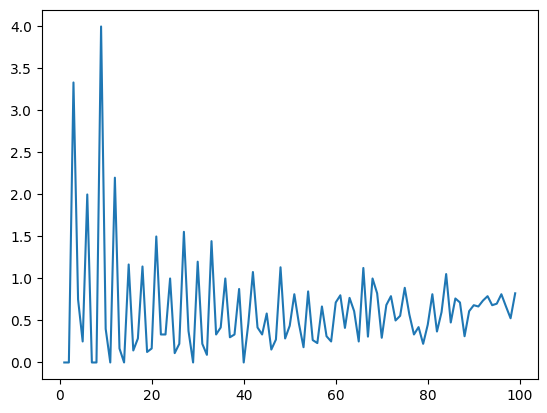

In [ ]:
plt.plot(np.arange(1,len(err) + 1),err)

По данному графику можно сделать вывод, что при меньшем уровне зашумления изображения возрастает ошибка, т.к. знаменатель (кол-во несовпадающих пикселей между эталонным и зашумленным изображением) достаточно мал, а числитель (кол-во несовпадающих пикселей между эталонным и предсказанным изображением) может принимать различные значения, также на поведение графика может повлиять то, что в массиве ошибок присутствуют значения ошибок рисунков треугольника, которые довольно сложно распознаются моделью.


Необходимо создать изображения размером 13x13 и проверить, насколько изменится значение ошибки.

Изначальные функции создания матриц были изменены таким образом, что теперь создаются матрицы 13 на 13.

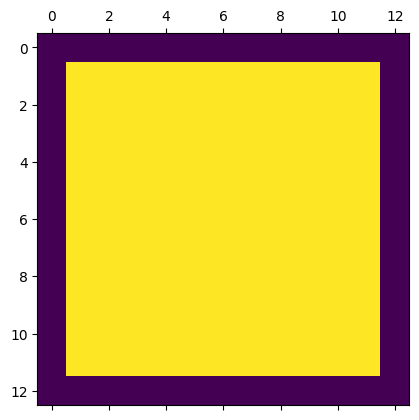

In [ ]:
def sqr13():
  square = np.ones((13,13), dtype = int)
  for index, item in enumerate(square):
    # если первая или последняя строка - закрашиваем
    if index == 0 or index == len(square) - 1:
      square[index] = [-1 for i in range (len(item))]
    # если первый или последний столбец - закрашиваем
    for index_1, item_1 in enumerate(item):
      if index_1 == 0 or index_1 == len(item) - 1:
        item[index_1] = -1
  return(square)
square13 = sqr13()
plt.matshow(square13)

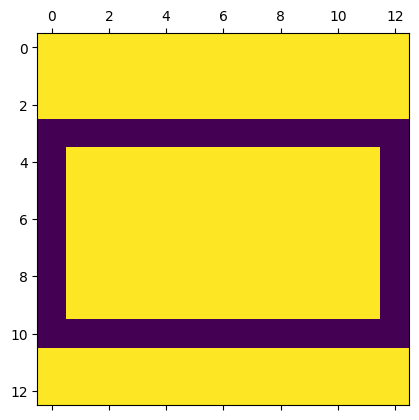

In [ ]:
def rect13():
  rectangle = np.ones((13,13), dtype = int)

  for index, item in enumerate(rectangle):
    # если 2 или 2 с конца строка то закрашиваем
    if index == 3 or index == len(rectangle) - 3:
      rectangle[index] = [-1 for i in range (len(item))]
    for index_one, item_one in enumerate(item):
      # если координата на первом или последнем столбце и больше 2 или меньше 7 - закрашиваем
      if (index_one== 0 or index_one == len(item) -1) and (index <= 10 and index >= 3):
        item[index_one] = -1
  return(rectangle)
rectangle13 = rect13()
plt.matshow(rectangle13)

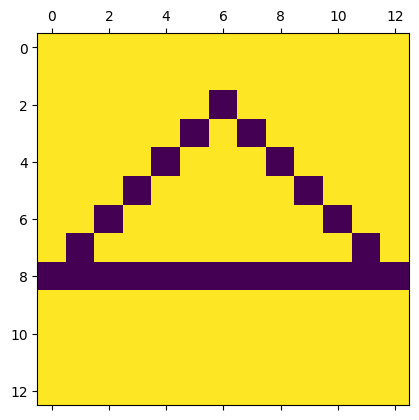

In [ ]:

def tri13():
  triangle = np.ones((13,13), dtype = int)
  n = 1
  # закрашиваем строку
  for index, item in enumerate(triangle):
    if index == len(item) - 5:
      triangle[index] = [- 1 for i in range (len(item)) ]

    for index_one, item_one in enumerate(triangle):
      # находится серединный элемент определенной строки
      if (index_one == round(len(item)/2)  ) and index == 2:
        item[index_one] = -1
      else:
          # находится серединный элемент с шагом
          if ((index_one == round(len(item)/2) + n) and index == n + 2):
            item[index_one] = -1
            item[round(len(item)/2) - n] = -1
            n += 1
  return triangle
triangle13 = tri13()
plt.matshow(triangle13)

Далее необходимо высчитать матрицу весовых коэффициентов по тому же алгоритму

In [ ]:
weight13 = np.zeros((len(rectangle13), len(rectangle13)))
for item in rectangle13:
  weight13 += np.outer(item.flatten(),item.flatten())
for item in square13:
  weight13 += np.outer(item.flatten(),item.flatten())
for item in triangle13:
  weight13 += np.outer(item.flatten(),item.flatten())
print(weight13)


[[39.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3. 39.]
 [ 3. 39. 35. 35. 35. 35. 35. 35. 35. 35. 35. 39.  3.]
 [ 3. 35. 39. 35. 35. 35. 35. 35. 35. 35. 39. 35.  3.]
 [ 3. 35. 35. 39. 35. 35. 35. 35. 35. 39. 35. 35.  3.]
 [ 3. 35. 35. 35. 39. 35. 35. 35. 39. 35. 35. 35.  3.]
 [ 3. 35. 35. 35. 35. 39. 35. 39. 35. 35. 35. 35.  3.]
 [ 3. 35. 35. 35. 35. 35. 39. 35. 35. 35. 35. 35.  3.]
 [ 3. 35. 35. 35. 35. 39. 35. 39. 35. 35. 35. 35.  3.]
 [ 3. 35. 35. 35. 39. 35. 35. 35. 39. 35. 35. 35.  3.]
 [ 3. 35. 35. 39. 35. 35. 35. 35. 35. 39. 35. 35.  3.]
 [ 3. 35. 39. 35. 35. 35. 35. 35. 35. 35. 39. 35.  3.]
 [ 3. 39. 35. 35. 35. 35. 35. 35. 35. 35. 35. 39.  3.]
 [39.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3. 39.]]


Диагональ была обнулена

In [ ]:

weight13 = diagonal_zeroes(weight13) * 1/len(weight13)


Был также создан словарь с 32 наборами изображений.

In [ ]:
dic13 = {}
for i in range(33):
  dic13[f"Зашумленное квадрат {i}"] = noise(sqr13(),i + 4)
  dic13[f"Предсказанное квадрат{i}"] = minus_plus(np.dot(dic13[f"Зашумленное квадрат {i}"], weight13))
  dic13[f"Зашумленное прямоугольник {i}"] = noise(rect13(),i + 4)
  dic13[f"Предсказанное прямоугольник{i}"] = minus_plus(np.dot(dic13[f"Зашумленное прямоугольник {i}"], weight13))
  dic13[f"Зашумленное треугольник {i}"] = noise(tri13(),i + 4)
  dic13[f"Предсказанное треугольник{i}"] = minus_plus(np.dot(dic13[f"Зашумленное треугольник {i}"], weight13))

failure13 = []
good13 = []
for i in range(33):
  if not np.array_equal(dic13[f"Предсказанное квадрат{i}"],square13):
    failure.append(dic13[f"Предсказанное квадрат{i}"])
  if  np.array_equal(dic13[f"Предсказанное квадрат{i}"],square13):
    good.append(dic13[f"Предсказанное квадрат{i}"])
  if not np.array_equal(dic13[f"Предсказанное прямоугольник{i}"],rectangle13):
    failure.append(dic13[f"Предсказанное прямоугольник{i}"])
  if  np.array_equal(dic13[f"Предсказанное прямоугольник{i}"],rectangle13):
    good.append(dic13[f"Предсказанное прямоугольник{i}"])
  if not np.array_equal(dic13[f"Предсказанное треугольник{i}"],triangle13):
    failure.append(dic13[f"Предсказанное треугольник{i}"])
  if  np.array_equal(dic13[f"Предсказанное треугольник{i}"],triangle13):
    good.append(dic13[f"Предсказанное треугольник{i}"])

for item in failure13:
  plt.matshow(item)

Был создан массив с ошибками для новых изображений размером 13 на 13

In [ ]:
err13 = []
for i in range(33):
  amount_noise_pixels = noise_pixels(dic13[f"Зашумленное прямоугольник {i}"],rectangle13)
  amount_pred_pixels = pred_pixels(dic13[f"Предсказанное прямоугольник{i}"], rectangle13)
  err13.append(amount_pred_pixels/amount_noise_pixels)
  amount_noise_pixels = noise_pixels(dic13[f"Зашумленное квадрат {i}"],square13)
  amount_pred_pixels = pred_pixels(dic13[f"Предсказанное квадрат{i}"], square13)
  err13.append(amount_pred_pixels/amount_noise_pixels)
  amount_noise_pixels = noise_pixels(dic13[f"Зашумленное треугольник {i}"],triangle13)
  amount_pred_pixels = pred_pixels(dic13[f"Предсказанное треугольник{i}"], triangle13)
  err13.append(amount_pred_pixels/amount_noise_pixels)

Был выведен график зависимости ошибок от процента зашумления

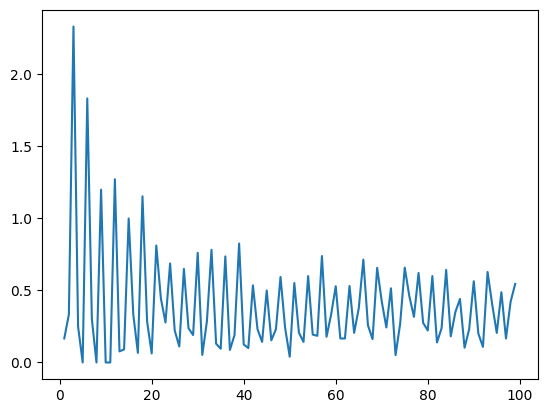

In [ ]:
plt.plot(np.arange(1,len(err13) + 1),err13)

По данному графику можно сделать вывод, что в среднем уровень ошибки упал, однако, сохраняются "пики", которые вероятнее всего отображают уровень ошибок для треугольников, т.к. эти изобржаения хуже всего обрабатываются нейронной сетью.